# Claim Insurance Predictions (Travel Insurance)
### Created By : Syahid Ahmad Mukrim

## Business Problem Understanding

**Background :**  
Travel insurance / Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan terhadap berbagai risiko saat kita melakukan perjalanan baik di dalam negeri maupun ke luar negeri. Beberapa risiko yang dilindungi seperti, keterlambatan atau pembatalan penerbangan, bagasi hilang, kejadian medis dan hal lainnya sesuai polis asuransi yang kita pilih. Jumlah premi yang dibayarkan bergantung dengan berbagai faktor seperti tujuan perjalanan, durasi perjalanan, usia pemegang polis, dan cakupan yang dipilih. 

Perusahaan asuransi perjalanan harus memastikan **kestabilan keuangan** perusahaan terhadap premi yang dikumpulkan. Pertama, premi tersebut digunakan untuk **membentuk dana klaim**, yaitu dana yang disisihkan untuk membayar klaim yang diajukan oleh pemegang polis jika terjadi kejadian tak terduga selama perjalanan. Kedua, sebagian **premi juga diinvestasikan** oleh perusahaan asuransi untuk menghasilkan pendapatan tambahan. Investasi ini membantu mengimbangi biaya klaim dan meningkatkan keuntungan perusahaan. Premi juga digunakan untuk menutupi **biaya operasional perusahaan** yang terkait dengan menyediakan layanan travel insurance kepada pemegang polis. Dengan mengelola premi dengan baik, perusahaan asuransi dapat memastikan bahwa mereka memiliki dana yang cukup untuk membayar klaim, menjaga kestabilan keuangan, dan memberikan perlindungan yang dijanjikan kepada pemegang polis.

**Problem Statement :**

Perusahaan asuransi perjalanan ingin meningkatkan efisiensi perencanaan dana pertanggungan dengan memprediksi kemungkinan seorang pemegang polis akan mengajukan klaim atau tidak. Dengan perencanaan dana yang tepat, perusahaan dapat menjaga kredibilitas melalui proses klaim yang lancar dan mengurangi risiko dana tidak terpakai akibat rendahnya jumlah pemegang polis yang mengajukan klaim.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pemegang polis apakah akan mengajukan klaim atau tidak. Sehingga dapat memperkirakan dengan cara:

 - Mengembangkan model prediksi yang dapat memperkirakan probabilitas pemegang polis mengajukan klaim asuransi. Dengan memperkirakan klaim potensial dengan akurat, Departemen keuangan dapat mengalokasikan dana asuransi secara tepat, memastikan dana yang cukup tersedia untuk menutupi klaim yang diharapkan sambil meminimalkan risiko dana tidak terpakai.
 - Mengetahui faktor yang mempengaruhi pemegang polish untuk melakukan klaim

**Stakeholder :**
Departemen Keuangan ( Departemen Keuangan bertanggung jawab untuk mengelola aspek keuangan perusahaan secara keseluruhan. Mereka dapat terlibat dalam mengelola premi yang dikumpulkan, mengalokasikan dana untuk dana klaim, mengelola investasi, dan memantau kesehatan keuangan perusahaan. )

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pemegang polis yang akan melakukan klaim atau tidak berdasarkan variabel yang ada. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pemegang polis akan mengajukan klaim atau tidak berdasarkan riwayat data sebelumnya.

**Metric Evaluation** :

Target (Claim) :

0 (No)  : Tidak Melakukan Klaim

1 (Yes) : Melakukan Klaim 

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Gambar" width="500">

- TP : Jumlah pemegang polis yang memang benar melakukan klaim 
- TN : Jumlah pemegang polis yang memang benar tidak melakukan klaim 

Type of Error:
- Type 1 erorr (FP) : False Positive ( Pemegang polis diprediksi melakukan klaim, padahal aktualnya tidak melakukan klaim )

Konsekuensi: Dana klaim tidak terpakai(idle money), dana yang seharusnya dapat dimaksimalkan untuk investasi atau biaya operasional perusahaan
- Type 2 error (FN) : False Negative ( Pemegang polis diprediksi tidak melakukan klaim, padahal aktualnya mengajukan klaim)

Konsekuensi: Perusahaan perlu mengeluarkan dana yang tidak terduga untuk memenuhi claim pemegang polis. Hal tersebut dapat mengganggu proses klaim pelanggan sehingga kredibilitas perusahaan dapat berkurang

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang harus mempertimbangkan Type Error 1 (False Positive) dan Type Error 2 (False Negative). Jadi nanti metric utama yang akan kita gunakan adalah balanced accuracy dibandingkan accuracy biasa karena terdapat highly imbalanced (98.2% dan 1.8% ) pada data target claim ( [Balanced Accuracy: When Should You Use It?](https://neptune.ai/blog/balanced-accuracy) ).

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering # encoder dan scaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
#Load Dataset
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


## Data Understanding

### Data Information
| Variable              | Description                                       |
|-----------------------|--------------------------------------------------|
| Claim Status          | Target: Claim Status (Yes/No)                            |
| Agency                | Nama agensi asuransi perjalanan                                 |
| Agency Type           | Jenis agensi asuransi perjalanan (Airlines atau Travel Agency)                |
| Distribution Channel  | Saluran distribusi agensi (Online / Offline)|
| Product Name          | Nama produk asuransi perjalanan yang dipilih oleh pemegang polis            |
| Duration              | Durasi perjalanan (Hari)                               |
| Destination           | Tujuan perjalanan (Negara)                            |
| Net Sales             | Total penjualan bersih polis asuransi perjalanan     |
| Commission            | Komisi yang diterima agensi asuransi perjalanan dari perusahaan asuransi  |
| Gender                | Jenis kelamin pemegang polis                              |
| Age                   | Umur pemegang polis                                  |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
# Checking data type, missing value, %missing value and unique value in columns
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'n_null', 'nullPct(%)', 'n_unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,n_null,nullPct(%),n_unique,uniqueSample
0,Agency,object,0,0.00,16,"[LWC, EPX]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Comprehensive Plan, Basic Plan]"
4,Gender,object,31647,71.39,2,"[M, nan]"
5,Duration,int64,0,0.00,437,"[413, 378]"
6,Destination,object,0,0.00,138,"[LUXEMBOURG, LITHUANIA]"
7,Net Sales,float64,0,0.00,1006,"[50.25, 19.2]"
8,Commision (in value),float64,0,0.00,915,"[4.6, 9.1]"
9,Age,int64,0,0.00,89,"[43, 71]"


### Check Duplicate Data

In [5]:
# Checking Duplicate Data
df.duplicated().sum()

4667

In [6]:
# Checking Claim Proportion in Duplicate data
df[df.duplicated()]['Claim'].value_counts()

Claim
No     4665
Yes       2
Name: count, dtype: int64

In [7]:
# Checking Duplicate Data Proportion
df.duplicated().sum() / len(df)

0.10528334235697527

### Checking Missing Value

In [8]:
# Checking Missing Value in Gender column
df['Gender'].isna().sum()/len(df)

0.7139279913373038

### Checking Imbalanced Data

In [9]:
# Checking Imbalanced Data
df['Claim'].value_counts()/len(df)

Claim
No     0.984727
Yes    0.015273
Name: count, dtype: float64

Berdasarkan hasil pemeriksaan data, berikut adalah beberapa insight yang didapat untuk memulai membentuk model:

1. Format Data : Setiap kolom memiliki format data yang sesuai dan konsisten

2. Duplicate Data : Terdapat data duplikat sebanyak 10% dari total dataset

3. Missing Values : Kolom "Gender" memiliki missing value sebanyak 71 % 

4. Categorical Variables : Kolom berikut dapat dipertimbangkan untuk dilakukan encoding agar dapat dilakukan proses modeling
- Agency
- Agency Type
- Distribution Channel
- Product Name
- Destination

5. Numerical Variables : Pemeriksaan lebih lanjut perlu dilakukan untuk melihat hubungan/ korelasi numerical data dengan proses keputusan klaim untuk analisa pembuatan machine learning
- Duration
- Net Sales
- Commision (in value)
- Age

6. Data Balancing (Imbalanced Classes) : Kolom "Claim" sebagai target prediksi perlu dianalisa lebih lanjut

## Data Cleaning & EDA (Exploratory Data Analysis)

### Handling Missing Value

In [10]:
# Drop Gender since more than 50% are missing
df.drop(columns="Gender", inplace = True)

Kolom 'Gender' memiliki lebih dari 50% missing value, apabila mengisi missing value pada kolom dalam jumlah besar dapat terjadi bias ketika membuat model.

### Handling Duplicate Data

In [11]:
# Remove Duplicate Data
df.drop_duplicates(keep='first',inplace=True)

# Checking Duplicate Data
df.duplicated().sum()

0

Terdapat 4667 data duplikat yang akan dihapus karena dapat mempengaruhi proses pembelajaran mesin sehingga menghasilkan model yang bias (dapat menyebabkan overfitting/ underfitting)

### EDA & Checking Outlier

EDA (Exploratory Data Analysis) dilakukan untuk memahami masing masing variabel/feature terhadap target sebelum dilakukan pemodelan. Eksplorasi akan dibagi menjadi 2 jenis variabel, kategorikal dan numerikal. Pada variabel kategorikal kita dapat melihat distribusi masing-masing variabel serta persentase terhadap variabel target. Hal ini membantu kita memahami bagaimana variabel kategorikal berhubungan dengan variabel target dan apakah ada kelas yang memiliki pengaruh signifikan terhadap target. Sedangkan, pada variabel numerikal kita dapat melihat persebaran data, mengidentifikasi adanya outliers, dan menganalisis korelasi antara variabel numerikal dengan variabel target. Informasi ini dapat membantu kita memahami hubungan antara variabel numerikal dengan target, serta memilih metode yang tepat pada preprocessing sebelum pemodelan

#### Categorical Variabel

In [20]:
# Plot function variabel categorical
def plot_claim_by_feature(data, column, figsize=(8, 5)):
    claim_counts = data.groupby(column)['Claim'].value_counts().unstack()

    table = claim_counts.copy()

    table_sorted = table.sort_values('Yes', ascending=False).head(10)

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

    table_sorted['Yes'].plot(kind='bar', stacked=True, ax=ax1, color='green', label='Yes')

    ax1.set_title(f'Claim Frequencies by {column}')
    ax1.set_ylabel('Frequency (Yes)')
    ax1.legend(loc='upper right')

    table_sorted['No'].plot(kind='bar', stacked=True, ax=ax2, color='red', label='No')

    ax2.set_ylabel('Frequency (No)')
    ax2.legend(loc='upper right')

    plt.show()

    table_percentage = (table_sorted.divide(table_sorted.sum(axis=1), axis=0) * 100).round(2)

    print('')
    print('----Percentage Table----')
    return table_percentage


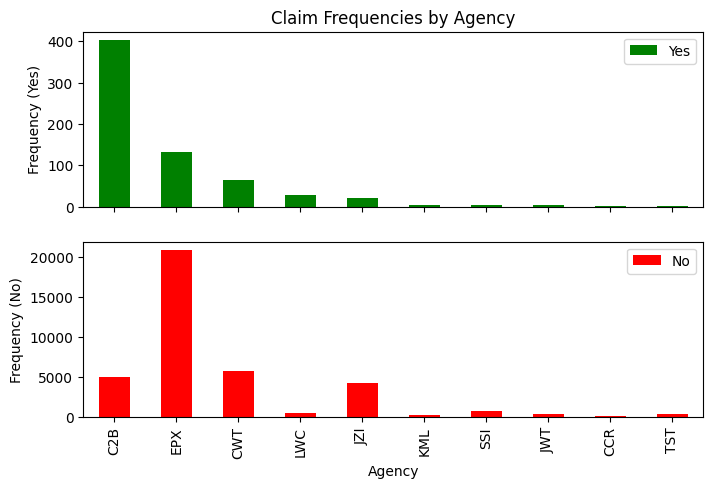


----Percentage Table----


Claim,No,Yes
Agency,,
C2B,92.44,7.56
EPX,99.37,0.63
CWT,98.88,1.12
LWC,93.58,6.42
JZI,99.48,0.52
KML,97.82,2.18
SSI,99.30,0.70
JWT,98.59,1.41
CCR,98.25,1.75


In [21]:
plot_claim_by_feature(df, 'Agency', figsize=(8, 5))

EPX adalah agensi yang paling banyak diminati oleh pemegang polis. Namun, proporsi klaim paling banyak terdapat pada agensi C2B dan di ikuti oleh LWC.

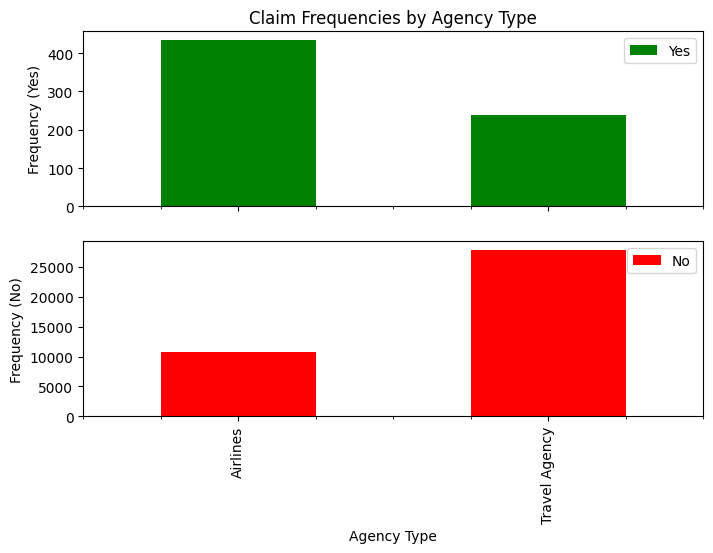


----Percentage Table----


Claim,No,Yes
Agency Type,,
Airlines,96.13,3.87
Travel Agency,99.15,0.85


In [22]:
plot_claim_by_feature(df, 'Agency Type', figsize=(8, 5))

Pemegang polis pada tipe agensi travel agency dua kali lebih banyak dibandangkan Airlines, namun terlihat proporsi paling banyak jumlah klaim pada tipe agensi Airlines dibandingkan Travel agency.

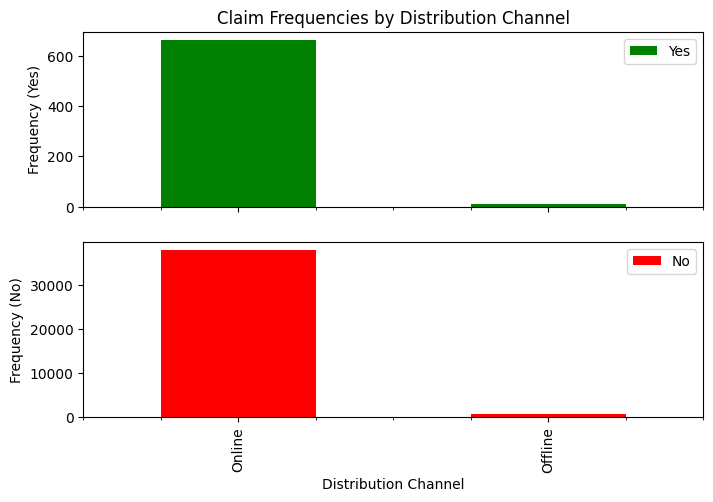


----Percentage Table----


Claim,No,Yes
Distribution Channel,,
Online,98.29,1.71
Offline,98.45,1.55


In [23]:
plot_claim_by_feature(df, 'Distribution Channel', figsize=(8, 5))

Terlihat berdasarkan sebarannya, meskipun pemegang polis banyak pada channel distribusi online, tetapi proporsi yang melakukan klaim cenderung sama.

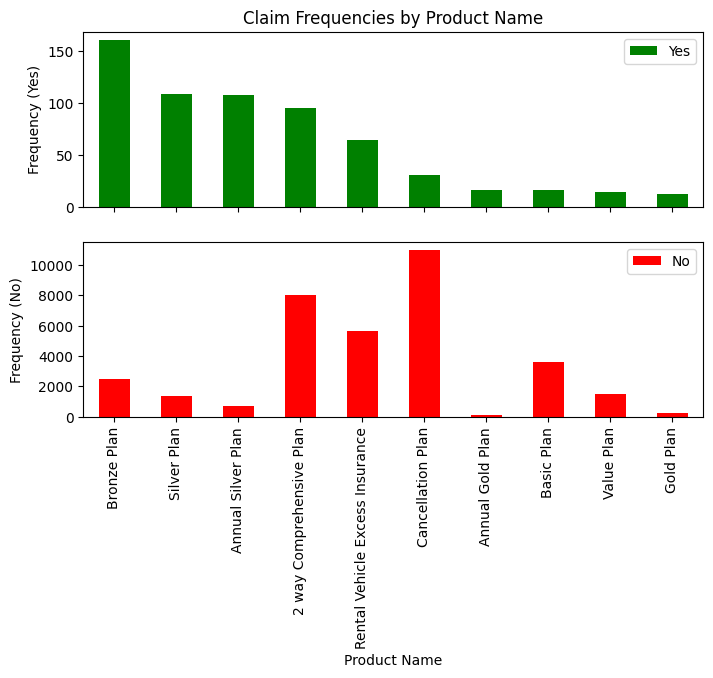


----Percentage Table----


Claim,No,Yes
Product Name,,
Bronze Plan,93.93,6.07
Silver Plan,92.70,7.30
Annual Silver Plan,87.40,12.60
2 way Comprehensive Plan,98.83,1.17
Rental Vehicle Excess Insurance,98.88,1.12
Cancellation Plan,99.72,0.28
Annual Gold Plan,88.24,11.76
Basic Plan,99.56,0.44
Value Plan,99.10,0.90


In [24]:
plot_claim_by_feature(df, 'Product Name', figsize=(8, 5))

In [25]:
# Checking duration by product name
df.groupby('Product Name')['Duration'].median().reset_index().sort_values(by='Duration', ascending=False).head(10)

,Product Name,Duration
7,Annual Travel Protect Silver,381.0
5,Annual Travel Protect Gold,371.0
6,Annual Travel Protect Platinum,369.5
4,Annual Silver Plan,369.0
3,Annual Gold Plan,368.0
21,Spouse or Parents Comprehensive Plan,366.0
14,Individual Comprehensive Plan,365.0
11,Child Comprehensive Plan,365.0
12,Comprehensive Plan,54.0
22,Ticket Protector,45.0


Beberapa produk seperti Annual Silver Plan dan Annual Gold Plan memiliki peresentase klaim diatas 10%, hal tersebut karena kedua produk memiliki durasi waktu yang cukup lama (mengcover dalam satu tahun) dan mencakup berbagai macam risiko perjalanan.

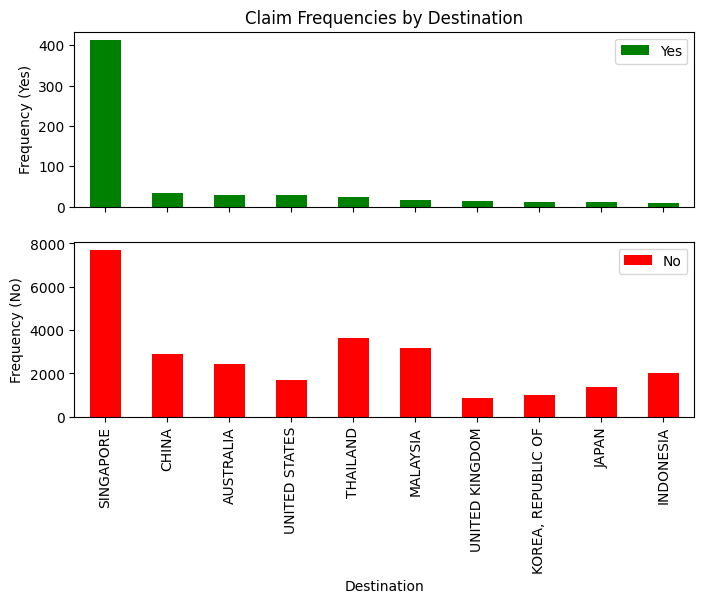


----Percentage Table----


Claim,No,Yes
Destination,,
SINGAPORE,94.91,5.09
CHINA,98.87,1.13
AUSTRALIA,98.78,1.22
UNITED STATES,98.32,1.68
THAILAND,99.34,0.66
MALAYSIA,99.50,0.50
UNITED KINGDOM,98.52,1.48
"KOREA, REPUBLIC OF",98.80,1.20
JAPAN,99.21,0.79


In [26]:
plot_claim_by_feature(df, 'Destination', figsize=(8, 5))

Tujuan ke Singapura memiliki proporsi pengajuan klaim paling banyak 5.09 % hal tersebut selaras dengan banyaknya pemegang polis ke Singapura diatas 8000 transaksi. 

#### Numerical Variabel

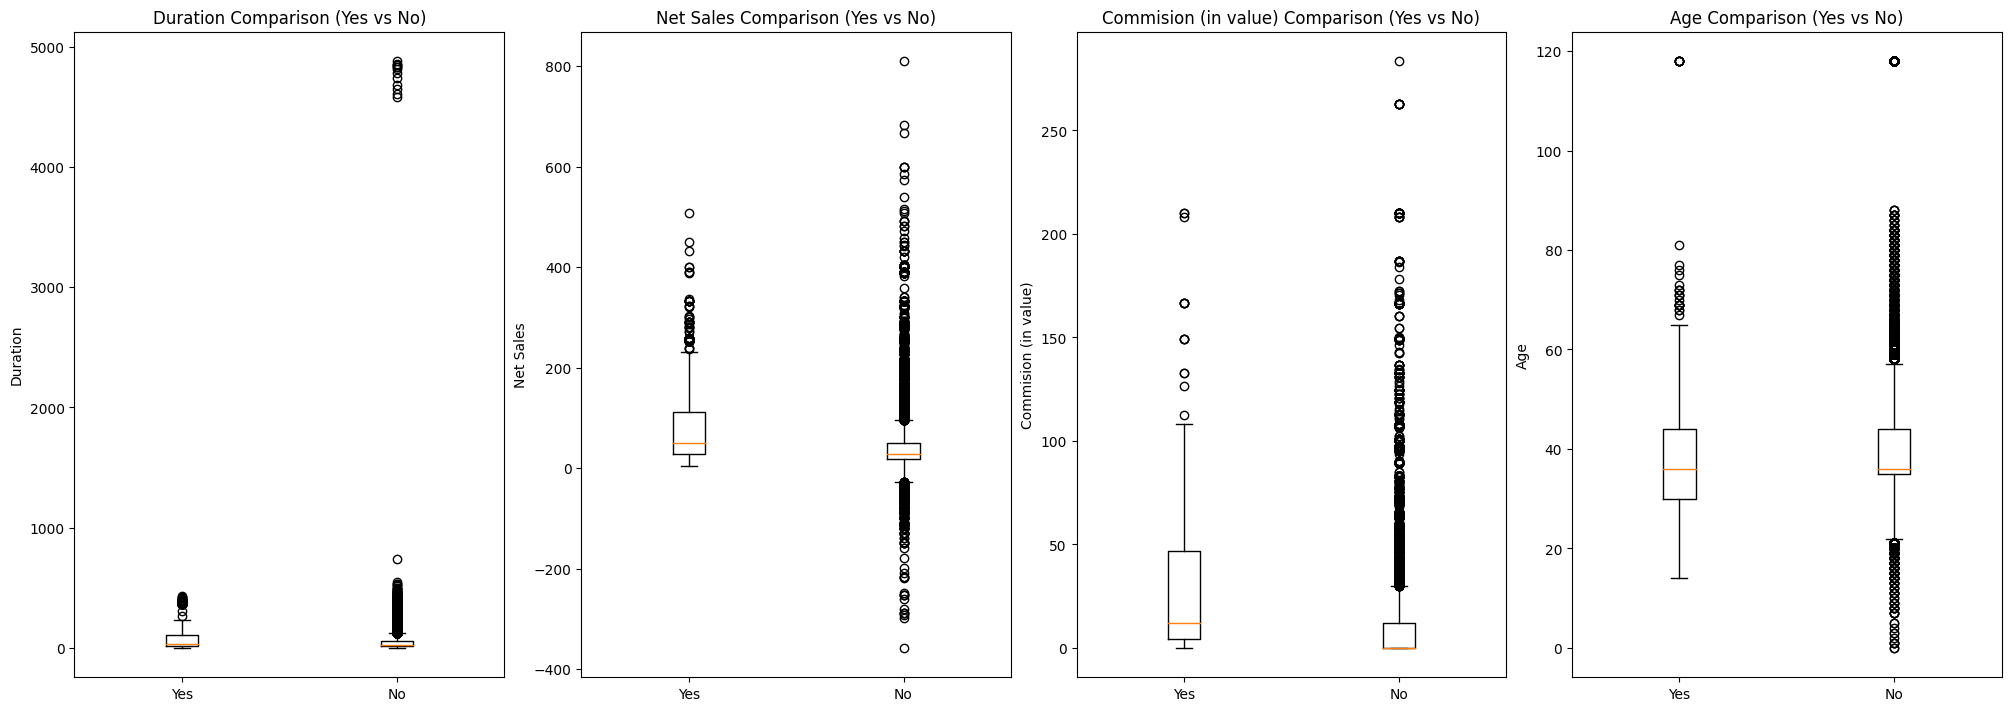

In [27]:
# Checking Distribution Data Numerical Variabel by Claim Type
claim_yes = df[df['Claim'] == 'Yes']
claim_no = df[df['Claim'] == 'No']

num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 7), constrained_layout=True)

for ax, col in zip(axes, num_cols):
    ax.boxplot([claim_yes[col], claim_no[col]])
    ax.set_xticklabels(['Yes', 'No'])
    ax.set_ylabel(col)
    ax.set_title(f'{col} Comparison (Yes vs No)')

plt.show()

In [28]:
# Describing numerical variable
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39324.000000,39324.00000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054
std,113.404932,49.70403,20.345275,13.225494
min,-1.000000,-357.50000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000
50%,25.000000,29.00000,0.000000,36.000000
75%,57.000000,50.00000,11.880000,44.000000
max,4881.000000,810.00000,283.500000,118.000000


1. Pada kolom 'Age' terdapat usia diatas 100 tahun dan berusia 0
2. Terdapat Duration dan Net Sales bernilai minus(<0) 
3. Keempat variabel numerikal persebarannya tidak normal dan terlihat ada beberapa outliers

Perlu ditinjau lebih lanjut ketiga hal diatas dan bagaimana nanti ditangani

In [29]:
# Checking Age greater than 100
df[(df['Age'] >100)]['Age'].value_counts()

Age
118    423
Name: count, dtype: int64

In [30]:
# Deleting Age greater than 100
df = df[(df['Age'] <=100)]
df['Age'].max()

88

Ketika dicheck usia yang diatas 100, terlihat semua usianya adalah 118 dengan 423 data. Hal tersebut bisa terjadi karena kesalahan input. Setelah dihapus, terlihat usia maksimumnya menjadi 88 tahun.  

In [31]:
# Checking Age lower or equal than 0 
df[(df['Age'] <=0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
37815,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.0,10.5,0,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,No


In [32]:
# Deleting Age lower or equal than 0 
df=df[(df['Age'] >0)]
df[(df['Age'] <=0)]


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Terdapat dua transaksi yang berusia 0, terdapat +- pada net sales, ini bisa terjadi karena cancelation akan kita drop karena Age 0 tidak relevan.

In [33]:
# Checking Duration lower than 0
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Ketika ingin dilakukan penghapusan duration yang bernilai minus, ternyata sudah ikut terhapus berdasarkan umur diatas 100. Hal tersebut semakin menguatkan karena kesalahan input.

In [34]:
df[(df['Duration'] >1000)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
4678,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
10172,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,No
12140,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,No
19497,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
20038,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
22215,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,No
25606,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,No
28032,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,No
37207,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,No


In [35]:
# Deleting Duration greater than 1000
df = df[(df['Duration'] <=1000)]
df['Duration'].max()

740

Terdapat 13 data dengan durasi diatas 1000 hari (3 tahun). Hal tersebut tidak relevan, dan ketika di check data chenderung duplikat pada beberapa kolom. Hal tersebut bisa terjadi karena kesalahan input. Setelah dihapus, terlihat durasi paling lama adalah 740. Hal ini masih wajar, mungkin pemegang polis merupakan mahasiswa/pelajar yang menetap selama 2 tahun kurang lebih.

In [36]:
df[(df['Net Sales'] < 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,AUSTRALIA,-59.40,35.64,28,No
...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,49,UNITED KINGDOM,-68.00,0.00,36,No


Net sales bernilai negatif dapat terjadi karena adanya pembatalan polis, hal tersebut wajar terjadi. Dan dapat terlihat beberapa Agency masih dapat memberikan Commision karena pembatalan polis masih dapat memberikan keuntungan untuk perusahaan.

In [37]:
# Replacing 'Yes' to 1 and 'No' to 0 for modeling
df['Claim'] = df['Claim'].replace({'Yes': 1, 'No': 0})
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


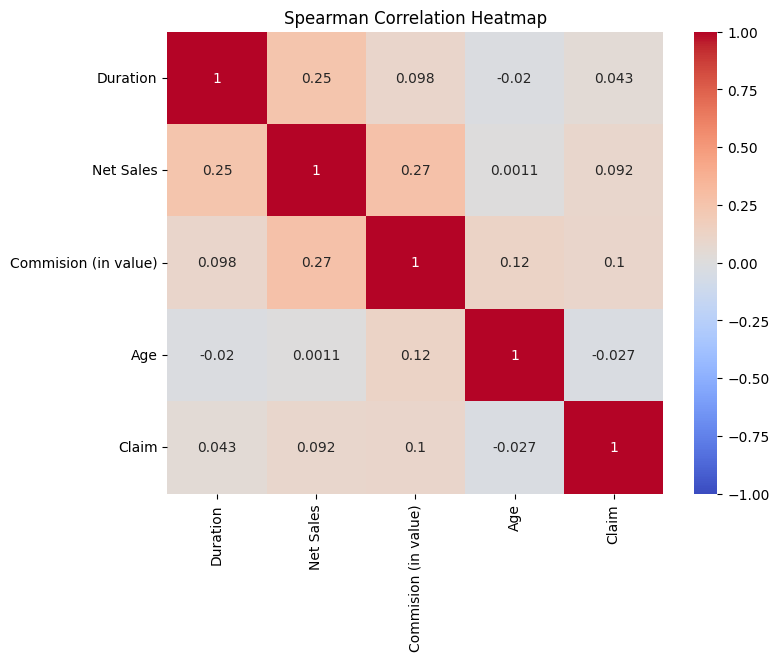

In [38]:
# Check the correlation between numerical variables and with the target variable 
cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

correlations = df[cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()

Hasil korelasi di atas menunjukkan hubungan antara variabel-variabel dalam dataset, termasuk variabel target "Claim". Uji korelasi menggunakan spearmen karena ke 4 variabel tidak normal persebarannya. Korelasi antar fitur terbilang lemah (< 0.3). Ketika tidak ada korelasi yang kuat antara variabel numerik, ini menunjukkan bahwa variabel tersebut dapat memberikan informasi yang unik atau independen untuk model

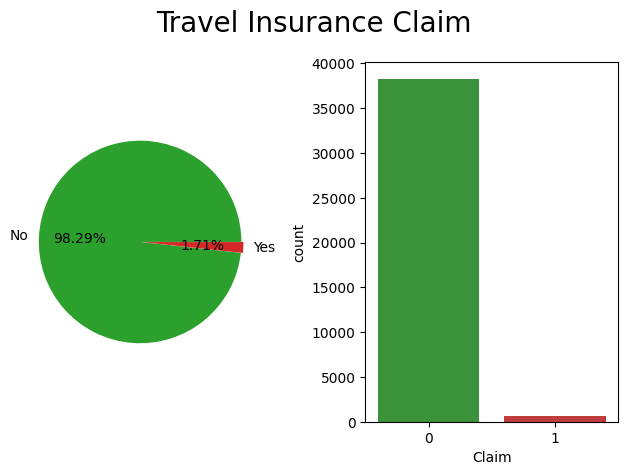

In [39]:
# Travel Insurance Claim type Proportion

plt.figure().suptitle('Travel Insurance Claim', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Claim'].value_counts(), labels=['No','Yes'], colors= ['tab:green','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=df, x='Claim',palette=['tab:green',"tab:red"])

plt.tight_layout()
plt.show()

Setelah dilakukan EDA dan Data Cleaning masih terjadi imbalance yang significant(highly imbalance), sehingga akan dilakukan resampling terhadap data yang ada untuk meningkatkan kinerja model pada kelas minoritas. Selanjutnya, kita akan mulai melakukan Data Pre-Processing sebelum masuk ke Model Benchmarking.

## Data Pre-processing
Data preprocessing bertujuan untuk meningkatkan performa model yang akan digunakan.

In [107]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'n_null', 'nullPct(%)', 'n_unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,n_null,nullPct(%),n_unique,uniqueSample
0,Agency,object,0,0.0,15,"[KML, CBH]"
1,Agency Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,26,"[Annual Travel Protect Silver, Bronze Plan]"
4,Duration,int64,0,0.0,423,"[388, 87]"
5,Destination,object,0,0.0,136,"[COSTA RICA, URUGUAY]"
6,Net Sales,float64,0,0.0,986,"[62.0, 0.0]"
7,Commision (in value),float64,0,0.0,884,"[6.67, 83.25]"
8,Age,int64,0,0.0,87,"[84, 50]"
9,Claim,int64,0,0.0,2,"[0, 1]"


### Data Splitting

In [108]:
# Define independent variable as feature
X = df.drop(columns = ['Claim'])

# Define dependent variable as target / label of prediction
y = df['Claim']

# Split Dataset for Training (75%) and Testing (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

### Feature Engineering (Encoding dan Scaling)
Proses processing yang dilakukan adalah encoding untuk feature kategorikal:
- One Hot Encoding : 'Agency Type', 'Distribution Channel' (Feature merupakan variabel nominal yang memiliki unique value sedikit)
- Binary Encoding : 'Agency', 'Product Name', 'Destination' (Feature merupakan variabel nominal yang memiliki banyak unique value)

Scaling untuk feature numerikal:
- RobustScalar: 'Duration', 'Net Sales', 'Commision (in value)', dan 'Age' 
(Pada keempat feature dilakukan robust scalar karena tidak normal persebarannya. Scaling dilakukan pada beberapa algoritma untuk mendapatkan hasil yang lebih maksimal)



### Data Transformation

Pada pemodelan KNN dan Logreg, di mana jarak dan konvergensi algoritma optimasi penting, scaling seperti menggunakan RobustScaler dapat membantu mengatasi pengaruh outlier. Oleh karena itu, dalam transformer dengan scalling, fitur-fitur numerik akan diubah menggunakan teknik scaling yang sesuai.
Sementara itu, pada model ensemble seperti voting dan stacking, yang melibatkan berbagai jenis algoritma termasuk KNN dan Logreg, scaling juga diterapkan. Hal ini dilakukan untuk memastikan keseragaman skala fitur numerik antara model-model dasar yang berbeda, sehingga tidak ada model yang mendominasi dalam proses voting atau stacking.

Namun, pada model berbasis pohon seperti Decision Tree dan ensemble dengan tipe yang sama seperti 'XGBoost Classifier', 'CatBoost Classifier', 'Rand Forrest Classifier', dan 'GradBoost Classifier', scaling tidak diperlukan. Model-model ini tidak terlalu terpengaruh oleh scalling dan dapat mengatasi outlier dengan baik secara alami. Oleh karena itu, dalam transformer tanpa scalling, fitur-fitur numerik tidak diubah dengan teknik scaling.


Sumber:

https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/

https://towardsdatascience.com/comparing-random-forest-and-gradient-boosting-d7236b429c15

In [109]:
# Combine preprocess in function transformer
transformer_with_scalling= ColumnTransformer([
                                ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(cols=['Agency','Product Name','Destination']), ['Agency','Product Name','Destination']),
                                ('robust',RobustScaler(),['Duration', 'Net Sales','Commision (in value)','Age'])

                                ], remainder='passthrough')

transformer_no_scalling= ColumnTransformer([
                                ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(cols=['Agency','Product Name','Destination']), ['Agency','Product Name','Destination'])

                                ], remainder='passthrough')

### Resampling
Diketahui bahwa proporsi targetnya ('Claim') sangat tidak seimbang, maka dalam modeling ini akan dilakukan resampling dengan metode imbalance oversampling dan undersampling untuk mengetahui treatment apa yang paling cocok. Proses resampling akan dimasukan kedalam model benchmarking.

- Oversampling (penambahan jumlah sampel dari kelas minoritas berdasarkan target 'Claim' dalam dataset)
    - RandomOverSampler
    - SMOTE
    
- Undersampling (pengurangan jumlah sampel dari kelas mayoritas berdasarkan target 'Claim' dalam dataset)
    - RandomUnderSampler
    - NearMiss

- Penggabungan Oversampling dan Undersampling
    - SMOOTENN

Sumber : https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis



## Model Benchmarking

Model benchmarking akan dilakukan untuk membandingkan performa berbagai model machine learning dengan berbagai metode penanganan imbalance data ataupun tidak. Benchmarking dilakukan untuk mengidentifikasi model yang paling efektif dalam menangani imbalance data dan memberikan hasil yang baik dalam hal metrik evaluasi utama yaitu balanced accuracy. Metrik seperti ROC AUC, precision, recall, F1 score, dan F2 score diperlihatkan sebagai pertimbangan. Setiap model dievaluasi menggunakan cross-validation dengan skema Stratified K-Fold dengan 5 lipatan dan diambil rata-rata hasil metrik evaluasinya.

In [110]:
# Cross_validate
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline

## Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import f1_score, precision_score, recall_score
from imblearn.combine import SMOTEENN

# Similar Type
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from catboost import CatBoostClassifier

# Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Metric for f2 score
from sklearn.metrics import make_scorer, fbeta_score
f2_score = make_scorer(fbeta_score, beta=2)

In [111]:
# Define Resampling Method
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# Define simple model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# Define ensemble model same type
xgb = XGBClassifier(random_state = 42)
cat = CatBoostClassifier(random_state=42, verbose=False)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define estimator for ensamble model various type
estimators = [
    ('tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('logreg', LogisticRegression(random_state=42))
]
stacking = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=42)
)
votingSoft = VotingClassifier(estimators=estimators, voting='soft')
votingHard = VotingClassifier(estimators=estimators, voting='hard')

# Models for benchmarking
models = {'KNN': knn, 
          'Logistic Regression':logreg, 
          'Voting Classifier - Soft': votingSoft,
          'Voting Classifier - Hard': votingHard,
          'Stacking': stacking,
          'Decision Tree': tree,
          'XGBoost Classifier' : xgb,
          'CatBoost Classifier' : cat,
          'Rand Forrest Classifier' : rf,
          'GradBoost Classifier' : gboost 
          }

models_with_scalling=['KNN', 
          'Logistic Regression', 
          'Voting Classifier - Soft',
          'Voting Classifier - Hard',
          'Stacking']

models_no_scalling=['Stacking',
          'Decision Tree',
          'XGBoost Classifier',
          'CatBoost Classifier',
          'Rand Forrest Classifier',
          'GradBoost Classifier']


# Define imbalance treatment methods
resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
    'smoteenn': smoteen
}

# Define metrics
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'roc_auc': 'roc_auc',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2':f2_score}

test_roc_auc_arr = []
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []
list_algo = []
list_resample = []


for name_resample,resample in resample.items():
    for name_algo,model in models.items():
        crossval = StratifiedKFold(n_splits=5) # 
        if name_algo in models_with_scalling:
            if resample == None:
                estimator = Pipeline([
                    ('transorm', transformer_with_scalling),
                    ('model', model),
                ])
            else:
                estimator = Pipeline([
                    ('transorm', transformer_with_scalling),
                    ('resample', resample),
                    ('model', model),
                ])
        elif name_algo in models_no_scalling:
            if resample == None:
                estimator = Pipeline([
                    ('transorm', transformer_no_scalling),
                    ('model', model),
                ])
            else:
                estimator = Pipeline([
                    ('transorm', transformer_no_scalling),
                    ('resample', resample),
                    ('model', model),
                ])

        list_algo.append(name_algo)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        test_roc_auc_arr.append(scores['test_roc_auc'].mean())
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        test_f2_arr.append(scores['test_f2'].mean())



model_bench = pd.DataFrame({
    'Model': list_algo,
    'Resample': list_resample,
    'Bal_Accur': test_accuracy_arr,
    'ROC_AUC': test_roc_auc_arr,
    'Precision': test_precision_arr,
    'Recall': test_recall_arr,
    'F1': test_f1_arr,
    'F2': test_f2_arr
})

model_bench

,Model,Resample,Bal_Accur,ROC_AUC,Precision,Recall,F1,F2
0,KNN,none,0.501581,0.601896,0.053571,0.004000,0.007442,0.004908
1,Logistic Regression,none,0.499948,0.801180,0.000000,0.000000,0.000000,0.000000
2,Voting Classifier - Soft,none,0.503322,0.783367,0.089683,0.008040,0.014717,0.009822
3,Voting Classifier - Hard,none,0.501773,NaN,0.100000,0.004000,0.007692,0.004950
4,Stacking,none,0.500000,0.787490,0.000000,0.000000,0.000000,0.000000
5,Decision Tree,none,0.527535,0.529810,0.059347,0.076141,0.066615,0.071992
6,XGBoost Classifier,none,0.503567,0.756561,0.094697,0.008040,0.014750,0.009828
7,CatBoost Classifier,none,0.502619,0.782478,0.066667,0.006040,0.011077,0.007383
8,Rand Forrest Classifier,none,0.503625,0.706033,0.055169,0.010040,0.016904,0.011985
9,GradBoost Classifier,none,0.501773,0.812106,0.080000,0.004000,0.007619,0.004938


In [112]:
model_bench.sort_values(by=['Bal_Accur'],ascending=False).head()

,Model,Resample,Bal_Accur,ROC_AUC,Precision,Recall,F1,F2
31,Logistic Regression,smote,0.753681,0.802851,0.060996,0.693374,0.112101,0.225454
21,Logistic Regression,rus,0.752166,0.802514,0.060641,0.691354,0.111457,0.224217
11,Logistic Regression,ros,0.751644,0.808156,0.060666,0.689333,0.111480,0.224153
51,Logistic Regression,smoteenn,0.751435,0.805772,0.056477,0.709394,0.104606,0.214083
24,Stacking,rus,0.751200,0.801077,0.058050,0.701354,0.107172,0.217771


In [113]:
model_bench.sort_values(by=['ROC_AUC'],ascending=False).head()

,Model,Resample,Bal_Accur,ROC_AUC,Precision,Recall,F1,F2
9,GradBoost Classifier,none,0.501773,0.812106,0.080000,0.004000,0.007619,0.004938
11,Logistic Regression,ros,0.751644,0.808156,0.060666,0.689333,0.111480,0.224153
51,Logistic Regression,smoteenn,0.751435,0.805772,0.056477,0.709394,0.104606,0.214083
59,GradBoost Classifier,smoteenn,0.722370,0.803465,0.078356,0.559131,0.137410,0.250895
31,Logistic Regression,smote,0.753681,0.802851,0.060996,0.693374,0.112101,0.225454


Hasil benchmarking ketika diurutkan terhadap metrik utama balanced accuracy, terlihat empat model dengan hasil benchmarking terbaik menggunakan model Logistic Regression. Logistic Regression dengan teknik Resampling SMOTE yang memiliki hasil sedikit lebih baik dibandingkan dengan teknik resampling lainnya. Nilai precision, F1, dan F2 yang cenderung sangat kecil terjadi karena keadaan data target/ label yang sangat imbalance, namun dapat dilihat dari balanced accuracy dan ROC AUC cukup baik diatas 75%. Meskipun begitu, metric ROC_AUC tidak dapat menjadi metrik utama ketika terjadi imbalance data yang signifikan ( [Balanced Accuracy: When Should You Use It?](https://neptune.ai/blog/balanced-accuracy) ). Terlihat ketika diurutkan berdasarkan ROC AUC, meskipun paling tinggi model GradBoost Classifier, metrik selainnya lebih kecil dibanding logistic regression dan hanya memiliki balanced accuracy 50%. Dengan demikian, model yang terpilih adalah Logistik Regresi dengan teknik resampling SMOTE.  

- Model Limitasi: Model terpilih hanya dapat digunakan pada data dengan nilai maximum dan minimum pada tiap variabel berikut / penggunaannya menjadi tidak valid jika nilai datanya diluar jangkauan ini:
    - Duration: 0 hingga 740
    - Net sales: -357.5 hingga 682.0
    - Commision : 0.0 hingga 262.76
    - Age: 1 hingga 88
    - Agency : 15 Agency yang telah terdaftar
    - Product Name : 26 Product yang sekarang disediakan
    - Destination : 136 Negara yang pernah menjadi destinasi tujuan berdasarkan data historis

Cara Kerja Model Logistic Regression

<img src="https://ashutoshtripathicom.files.wordpress.com/2019/06/image-59.png" alt="Gambar" width="700">


Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu pada kasus ini target 'Claim'. Model ini bekerja dengan menghitung log-odds (logaritma dari perbandingan peluang) dari variabel target sebagai fungsi linier dari variabel prediktor, kemudian mengaplikasikan fungsi logistik (sigmoid) untuk mengubah log-odds menjadi probabilitas. Dengan menggunakan teknik optimasi, model logistic regression mencari koefisien regresi yang terbaik untuk memaksimalkan kemungkinan (likelihood) data pelatihan. Dengan demikian, model ini dapat digunakan untuk klasifikasi biner dalam memprediksi pemegang polis akan melakukan klaim atau tidak. 

Berikut adalah parameter default pada logistic regression di library SKLearn:

LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)

Sumber: 

https://vincentmichael089.medium.com/machine-learning-2-logistic-regression-96b3d4e7b603

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Modeling with Best Model
Selanjutnya, akan dilakukan prediksi klaim berdasarkan dataset test yang telah dipisahkan sebelumnya untuk memastikan bahwa model yang digunakan memiliki kinerja yang baik dengan memperhatikan metrik yang dipilih.

In [114]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import balanced_accuracy_score,roc_auc_score

logreg = LogisticRegression(random_state=42)
smote = SMOTE(random_state=42)

score_accuracy = []
score_roc_auc =[]
score_precision = []
score_recall = []
score_f1 = []
score_f2 = []


model = Pipeline([
    ('transform', transformer_with_scalling),
    ('resampling', smote),
    ('model', logreg)
])
    

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_accuracy.append(balanced_accuracy_score(y_test, y_pred))
score_roc_auc.append(roc_auc_score(y_test,y_pred))
score_precision.append(precision_score(y_test, y_pred))
score_recall.append(recall_score(y_test, y_pred))
score_f1.append(f1_score(y_test, y_pred))
score_f2.append(fbeta_score(y_test, y_pred, beta=2))

score_before_tuning = pd.DataFrame({'Bal_Accur': score_accuracy,
                                    'ROC_AUC': score_roc_auc,
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F1 Score': score_f1,
                                    'F2 Score': score_f2}, 
                                    index=['Logreg Before Tuning'])
score_before_tuning

,Bal_Accur,ROC_AUC,Precision,Recall,F1 Score,F2 Score
Logreg Before Tuning,0.767706,0.767706,0.064171,0.718563,0.11782,0.236407


Berdasarkan hasil evaluasi, model logistik regresi sebelum hyperparameter tuning mempunyai nilai balanced accuracy sebesar 0.7677 , yang menunjukkan kemampuan model dalam memprediksi dengan benar baik yang mengajukan klaim maupun yang tidak mengajukan klaim. Selain itu, nilai area di bawah kurva ROC (ROC AUC) yang sama dengan 0.7677 menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kedua kelas. Selain itu, hasil berdasarkan model benchmarking dan pada saat test tidak berbeda jauh pada metrik, dapat menunjukan tidak terjadi over fitting/ under fitting. 

## Hyperparameter Tuning

Hyperparameter tuning bertujuan untuk memilih kombinasi parameter terbaik pada model yang menghasilkan nilai metrics yang optimal. `GridSearchCV` adalah sebuah objek yang memungkinkan Anda untuk mencari kombinasi terbaik dari hyperparameter dengan melakukan validasi silang (cross-validation) pada setiap kombinasi.
Parameter pada model logreg yang akan kita tuning ada empat:
- penalty : Parameter ini mengontrol jenis penalti yang digunakan dalam fungsi kerugian (loss function) saat melatih model
- C : Parameter ini mengatur kekuatan penalti. Nilai yang lebih kecil menunjukkan penalti yang lebih kuat, sedangkan nilai yang lebih besar menunjukkan penalti yang lebih lemah
- solver : Parameter ini menentukan algoritma solver yang digunakan dalam optimisasi fungsi kerugian. Solver digunakan untuk menemukan bobot optimal yang menghasilkan prediksi yang baik
- max_iter : Parameter ini mengatur jumlah maksimum iterasi yang digunakan oleh solver untuk mencapai konvergensi.

Sumber:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [115]:
from sklearn.model_selection import GridSearchCV

# hyperparameter for Logreg
hyperparam_space = {
    'model__penalty' : [None,'l2'],
    'model__C': [100, 10, 1, 0.1, 0.01],
    'model__solver': ['newton-cg', 'saga', 'lbfgs'],
    'model__max_iter': [500, 250, 150, 100]
}                                      

logreg = LogisticRegression(random_state=42)
smote = SMOTE(random_state=42)


pipe_model = Pipeline([
    ('prep', transformer_with_scalling),  
    ('resampling', smote),
    ('model', logreg)                  
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,          
    param_grid=hyperparam_space,    
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),                           
    scoring = 'balanced_accuracy', 
    n_jobs = -1               
)

In [116]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('binary',
                                                                         BinaryEncoder(cols=['Agency',
                                                                                             'Product '
                                                                                             'Name',
                                                                                             'Destination']),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destinati...
                                                                         RobustScaler(),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age'])])),
                                       ('resampling', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01],
                         'model__max_iter': [500, 250, 150, 100],
                         'model__penalty': [None, 'l2'],
                         'model__solver': ['newton-cg', 'saga', 'lbfgs']},
             scoring='balanced_accuracy')

In [117]:
logreg_tuning = gridsearch.best_estimator_

logreg_tuning.fit(X_train, y_train)

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = balanced_accuracy_score(y_test, y_pred_logreg_tuning)
roc_auc_logreg_tuning = roc_auc_score(y_test, y_pred_logreg_tuning)
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning)
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning)
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning)
f2_logreg_tuning = (fbeta_score(y_test, y_pred, beta=2))


score_after_tuning = pd.DataFrame({'Bal_Accur': accuracy_logreg_tuning,
                                   'ROC_AUC' : roc_auc_logreg_tuning, 
                                   'Precision': precision_logreg_tuning, 
                                   'Recall': recall_logreg_tuning, 
                                   'F1 Score': f1_logreg_tuning,
                                   'F2 Score': f2_logreg_tuning}, index=['Logreg  After Tuning'])
merged_scores = pd.concat([score_before_tuning, score_after_tuning])
merged_scores

,Bal_Accur,ROC_AUC,Precision,Recall,F1 Score,F2 Score
Logreg Before Tuning,0.767706,0.767706,0.064171,0.718563,0.117820,0.236407
Logreg After Tuning,0.768020,0.768020,0.064378,0.718563,0.118168,0.236407


In [118]:
print("Best Hyperparameters: ", gridsearch.best_params_)


Best Hyperparameters:  {'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga'}


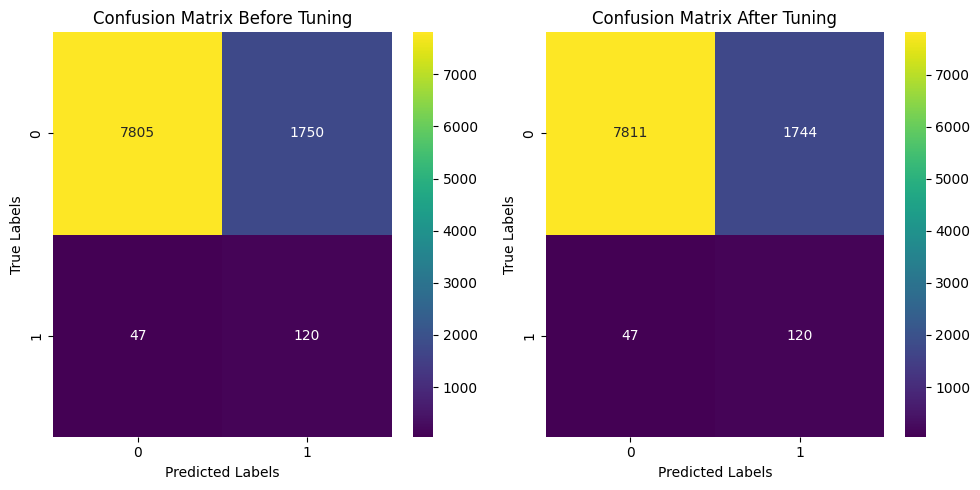

In [119]:
# Plot the confusion matrix heatmaps
cm_before = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_after = confusion_matrix(y_test, y_pred_logreg_tuning, labels=logreg_tuning.classes_)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


sns.heatmap(cm_before, annot=True, cmap="viridis", fmt="d", ax=axes[0])
axes[0].set_title("Confusion Matrix Before Tuning")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(cm_after, annot=True, cmap="viridis", fmt="d", ax=axes[1])
axes[1].set_title("Confusion Matrix After Tuning")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

In [120]:
merged_scores

,Bal_Accur,ROC_AUC,Precision,Recall,F1 Score,F2 Score
Logreg Before Tuning,0.767706,0.767706,0.064171,0.718563,0.117820,0.236407
Logreg After Tuning,0.768020,0.768020,0.064378,0.718563,0.118168,0.236407


Parameter yang terpilih hampir sama seperti defaultnya, hanya beda pada model solver. Ketika sebelum tuning, default parameter adalah 'lbfgs' dan setelah tuning terpilih 'saga'. Setelah tuning terlihat balanced accuracy dan ROC AUC naik sedikit menjadi 76.8 % dan pada precision juga naik, artinya banyaknya FP pada hasil prediksi turun. Terlihat pada confussion matrix terjadi penurunan sebanyak 6 transaksi pada FP setelah dilakukan tuning. Dengan demikian, kita akan memilih model setelah dilakukan hyperparameter tuning.

### Save Model

In [121]:
import pickle

# Save Model
filename = 'model_claim_pred.sav'
pickle.dump(logreg_tuning, open(filename, 'wb'))

#### Model Overview

Dari hasil proses pembuatan model, diketahui bahwa model terbaik adalah:
- Menggunakan scaling RobustScalar 
- Imbalance handling dengan teknik resampling Oversampling SMOTE
- Model menggunakan LogisticRegression dengan parameter terpilih setelah tuning:
    - C = 1, 
    - max_iter = 100,
    - penalty = l2,
    - solver = saga

- Model terpilih hanya dapat digunakan pada data dengan nilai maximum dan minimum pada tiap variabel berikut / penggunaannya menjadi tidak valid jika nilai datanya diluar jangkauan ini:
    - Duration: 0 hingga 740
    - Net sales: -357.5 hingga 682.0
    - Commision : 0.0 hingga 262.76
    - Age: 1 hingga 88
    - Agency : 15 Agency yang telah terdaftar
    - Product Name : 26 Product yang sekarang disediakan
    - Destination : 136 Negara yang pernah menjadi destinasi tujuan berdasarkan data historis
    - Gender : kolom ini di drop
    

#### Feature Importances

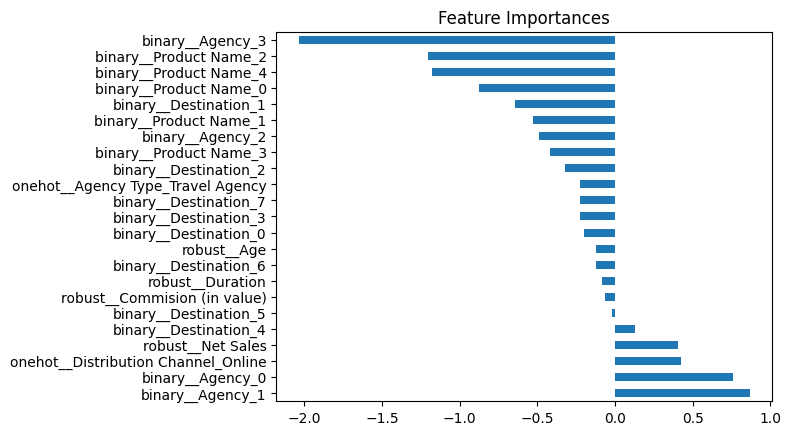

In [122]:
# Checking Feature Importances
feature_names = transformer_with_scalling.get_feature_names_out()
coef = pd.Series(logreg_tuning['model'].coef_[0], feature_names).sort_values(ascending=False)
coef.plot(kind='barh', title='Feature Importances')
plt.show()

Dapat dilihat dari feature importances diatas, beberapa feature sebagai faktor yang paling berpengaruh atas kemungkinan pemegang polis yang melakukan klaim atau tidak.

- Agensi tertentu berpengaruh signifikan terhadap pemegang polis baik yang tidak melakukan klaim atau melakukan klaim. Hal ini terjadi karena agensi memiliki kewenangan untuk menentukan kelayakan klaim berdasarkan ketentuan polis asuransi dan prosedur yang ditetapkan. 

- Pada pemegang polis yang melakukan klaim cukup berpengaruh dengan jenis distribusi channel yang dipilih dan besarnya net sales yang didapatkan perusahaan. Selain karena proporsi pemegang polis yang paling banyak pada channel online, akses untuk melakukan klaim juga lebih mudah ketika dilakukan secara online. Sedangkan, semakin besarnya net sales yang didapatkan perusahaan maka, semakin banyak juga risiko yang harus dicover oleh perusahaan. Namun, hal tersebut tergantung produk yang dipilih oleh pemegang polis. 

- Pada pemegang polis yang tidak melakukan klaim terlihat feature yang berpengaruh adalah Product Name dan Destinasi yang dipilih. Beberapa produk asuransi perjalanan mungkin menawarkan cakupan risiko yang terbatas dan destinasi yang dipilih mungkin aman dan memiliki risiko yang rendah. Negara-negara dengan infrastruktur pariwisata yang baik dan tingkat kejahatan yang rendah seperti Singapura menjadi destinasi tujuan yang paling banyak dipilih oleh pemegang polis. Hal-hal tersebut yang mungkin membuat pemegang polis tidak melakukan klaim.



## Conclusion & Recommendation

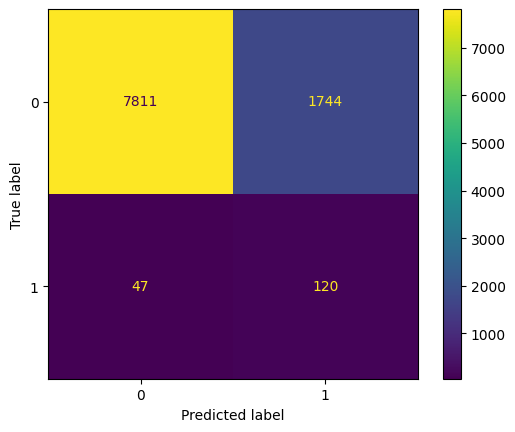

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm_after, display_labels=logreg_tuning.classes_)

display_cm.plot()

In [124]:
# Sum of Holders polis in data test
total_holders_polis = len(y_pred_logreg_tuning)
total_holders_polis

9722

### Business Overview
Diasumsikan biaya premi yang dibayarkan pemegang polis 50$ dan besarnya klaim yang harus ditanggung perusahaan 250% dari premi yang dibayarkan atau 125$ (berdasarkan sumber dari [Allianz Travel Insurance](https://www.allianz.co.id/explore/yuk-berkenalan-dengan-asuransi-perjalanan-dan-manfaatnya.html) ). Andaikan jumlah pemegang polis yang kita miliki untuk suatu kurun waktu sebanyak 9722 orang (berdasarkan data test), maka hitungannya kurang lebih akan seperti ini :
#### Tanpa Model :
Diasumsukan: perkiraan 30 % pemegang polis (2,917 orang) akan melakukan klaim 

- Total Biaya Premi dikumpulkan => 9,722 x 50 USD = 486,100 USD
- Total Biaya Klaim yang disiapkan => 2,917 x 125 USD = 364625 USD
- Biaya untuk Operasional dan Investasi => 486,100 – 364,625 = 121,475 USD
- Biaya Operasional => 121,475 x 80% = 97,180 USD
- Biaya Investasi => 121,475 x 20% = 24,295 USD
- Biaya Hasil investasi dalam 1 tahun => 24,295 + (24,295 x 5%) = 25,509.75 USD 
- Aktualnya hanya 167 orang yang melakukan klaim => 167 x 125 USD = 20,875 USD 
- Biaya klaim tidak terpakai => 364,625 – 20,875 = 343,750 USD (dalam 1 tahun)
 (Investasi tanpa risiko pada reksadana pasar uang dengan return 5% per tahun [Return Reksadana](https://blog.bibit.id/blog-1/cari-tahu-perbandingan-investasi-rp-10-juta-di-reksa-dana-pasar-uang-vs-deposito#:~:text=Dari%20segi%20return%2C%20pada%20umumnya,5%2D6%25%20per%20tahun.)) 
- Aktualnya hanya 167 orang yang melakukan klaim => 167 x 125 USD = 20875 USD (Setelah 1 tahun)
- Biaya klaim tidak terpakai (Biaya Klaim disiapkan - Biaya Klaim Aktual) => 364625 - 20875 = 343750 USD (dalam 1 tahun)

Menggunakan Model :
- TP : Total pemegang polis yang akan melakukan klaim dan di prediksi benar = 120
- TN : Total pemegang polis yang tidak melakukan klaim dan di prediksi benar = 7,811
- FP : Total pemegang polis yang tidak akan melakukan klaim dan di prediksi klaim = 1,744
- FN : Total pemegang polis yang akan melakukan klaim dan di prediksi tidak klaim = 47

Perhitungan dengan model:
- Total Biaya Premi dikumpulkan => 9,722 x 50 USD = 486,100 USD
- Total Biaya Klaim disiapkan => (TP + FP) x 125 USD = (120 + 1,744) x 125 USD =  233,000 USD
- Biaya Operasional dan Investasi => 481,600 - (218,000 + 15,000) = 253,100 USD
- Biaya Operasional => 253,100 x 80% = 202,480 USD
- Biaya Investasi => 253,100 x 20% = 50620 USD
- Biaya Klaim tidak terduga (saat diprediksi tidak klaim) => FN x 125 USD = 47 x 125 USD = 5,875 USD
- Biaya Aktual Klaim = TP x 125 USD = 120 x 125 = 15,000
- Biaya Hasil investasi dalam 1 tahun => 50,620+(50,620 x 5%) = 53,151 USD
- Biaya klaim tidak terpakai = 233,000 - 15000 - 5875 = 212,125 USD



#### Perbandingan menggunakan model / tidak:
Perbandingan menggunakan model / tidak:

Persentase perhitungan = (Biaya Menggunakan Model - Biaya Tanpa Model)/ Biaya Tanpa Model x 100%
- Biaya untuk operasional = (198,880 – 97,180) / 97,180 = 1.04 ==> 104 % / naik 2x lipat setelah menggunakan model
- Biaya + Hasil investasi = (53,151-25,509.75) / 25,509.75 = 1.08 ==> 108 % / naik 2x lipat setelah menggunakan model
- Biaya klaim tidak terpakai = (212,125 – 343,750) / 343,750 = -0.38 ==> 38 % lebih optimal penggunaannya dalam alokasi dana untuk operasional dan investasi


Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model, maka perusahaan tersebut akan mengoptimalkan biaya sebesar 38% terhadap biaya klaim yang tidak terpakai.

In [125]:
score_after_tuning

,Bal_Accur,ROC_AUC,Precision,Recall,F1 Score,F2 Score
Logreg After Tuning,0.76802,0.76802,0.064378,0.718563,0.118168,0.236407


In [126]:
final_report = classification_report(y_test, y_pred_logreg_tuning)
print(final_report)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      9555
           1       0.06      0.72      0.12       167

    accuracy                           0.82      9722
   macro avg       0.53      0.77      0.51      9722
weighted avg       0.98      0.82      0.88      9722



### Conclusion

- Secara kesuluruhan, model memiliki kemampuan klasifikasi cukup baik dalam memprediksi dengan benar baik pemegang polis yang mengajukan klaim maupun yang tidak mengajukan klaim dengan melihat balanced_accuracy dan nilai ROC_AUC sebesar 76.8 %. Model dapat mengetahui 82 % pemegang polis yang tidak melakukan klaim dan 72% pemegang polis yang akan melakukan klaim (berdasarkan recall). Namun, model cukup berjuang dalam memprediksi dengan jumlah yang tepat pemegang polis yang akan melakukan klaim sebesar 6.4% (berdasarkan precision) dikarenakan dataset sangat imbalanced. Tetapi, hal tersebut tidak apa-apa karena menjadi titik aman bagaimana nantinya perusahaan dalam menangani pemegang polis yang akan melakukan klaim.

- Berdasarkan analisa faktor yang berpengaruh terhadap pemegang polis melakukan klaim, faktor - faktornya adalah Agensi yang dipilih, channel distribusi, dan Net Sales yang diterima perusahaan (berdasarkan feature importance).

- Berdasarkan contoh hitungan pada business overview, terlihat bahwa dengan menggunakan model, perusahaan dapat mengoptimalkan biaya klaim yang tidak terpakai sebesar 38% dengan cara mendistribusikannya untuk biaya operasional dan investasi.

### Recommendation
Adapun beberapa rekomendasi yang dapat diberikan terkait sisi model dan bisnis: 
* Model:
    - Saat penarikan data, memastikan data yang didapat tidak ada missing value pada variabel gender
    - Penambahan data historis yang lebih lama, terutama pemegang polis yang melakukan klaim agar mengurangi imbalance data yang signifikan
    - Adanya kolom dengan fitur lain yang berhubungan dengan status klaim seperti ID pemegang polis, waktu pemesanan produk asuransi agar saat data cleaning lebih subjektif 
    - Model dapat ditingkatkan dengan melakukan tuning hyperparameter dengan nilai yang sudah didapat sebagai referensi dan menambahkan parameter lain
    - Pemilihan teknik resampling lain yang belum digunakan seperti ADASYN (Adaptive Synthetic)
* Bisnis:
    - Pada dana yang disiapkan untuk pertanggungan klaim, sebagian dapat diinvestasikan juga pada platform yang dapat diambil dengan cepat (< dari waktu pencairan polis). Sehingga, dapat diambil sewaktu-waktu dibutuhkan dengan cepat. Namun, perlu dianalisa resikonya lebih lanjut.
    - Maksimalkan sebagian biaya operasional untuk menambah customer travel insurance, dikarenakan berdasarkan data historis hanya 2% yang melakukan klaim dibandingkan 98% yang tidak melakukan klaim. Hal tersebut menandakan bahwa bisnis ini berjalan sangat baik dan menguntungkan.
    - Menggunakan model machine learning yang telah dibuat sebagai pertimbangan solusi untuk menentukan proporsi dana untuk klaim, biaya operasional dan investasi. Tentunya dibutuhkan analisis dan evaluasi lebih mendalam untuk penerapannya    
    - Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.